In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"E:\Wind Turbines\20180101-20180131 - C (1).csv", encoding='ISO-8859-1')  # Update with your path

# Show basic info
print(df.info())
print(df.describe())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252720 entries, 0 to 252719
Data columns (total 56 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   Time                                           252720 non-null  object 
 1   nacelle_vibration_sensor_x                     252720 non-null  float64
 2   nacelle_vibration_sensor_y                     252720 non-null  float64
 3   nacelle_vibration_sensor_momentary_offset_max  252720 non-null  float64
 4   nacelle_vibration_effective_value              252720 non-null  float64
 5   wind_speed_1                                   252720 non-null  float64
 6   wind_speed_2                                   252720 non-null  float64
 7   wind_speed                                     252720 non-null  float64
 8   wind_direction_1                               252720 non-null  float64
 9   wind_direction_2                     

In [3]:
df.describe().T  # View summary statistics of all features


,count,mean,std,min,25%,50%,75%,max
nacelle_vibration_sensor_x,252720.0,-0.000181,0.003777,-0.040513,-0.001450,0.000015,0.000992,0.038591
nacelle_vibration_sensor_y,252720.0,-0.000238,0.005010,-0.066393,-0.002426,0.000015,0.001480,0.072771
nacelle_vibration_sensor_momentary_offset_max,252720.0,0.000300,0.000269,0.000000,0.000198,0.000281,0.000376,0.070477
nacelle_vibration_effective_value,252720.0,0.003833,0.003718,0.000000,0.001058,0.002824,0.005440,0.099553
wind_speed_1,252720.0,4.545045,2.237816,0.000000,2.747154,4.244738,6.034295,16.696410
wind_speed_2,252720.0,4.561748,2.253059,0.000000,2.758330,4.255914,6.067080,16.930330
wind_speed,252720.0,4.553396,2.242451,0.000000,2.758330,4.261502,6.034295,16.813370
wind_direction_1,252720.0,49.444427,81.711648,0.000000,0.000000,0.000000,155.955700,359.648400
wind_direction_2,252720.0,180.090909,23.346040,0.000000,167.997100,181.104200,192.530300,359.648400
wind_direction_25s,252720.0,49.420693,81.352513,0.000000,0.000000,0.000000,163.822900,307.308000


In [4]:
missing = df.isnull().sum()
print(missing[missing > 0])


yaw_deviation_wind_nacelle_position    1
dtype: int64


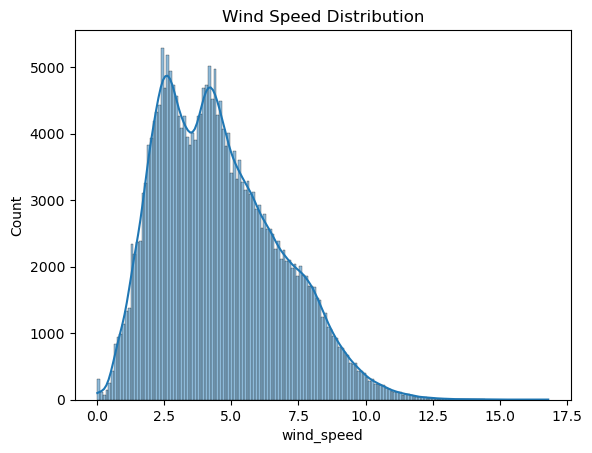

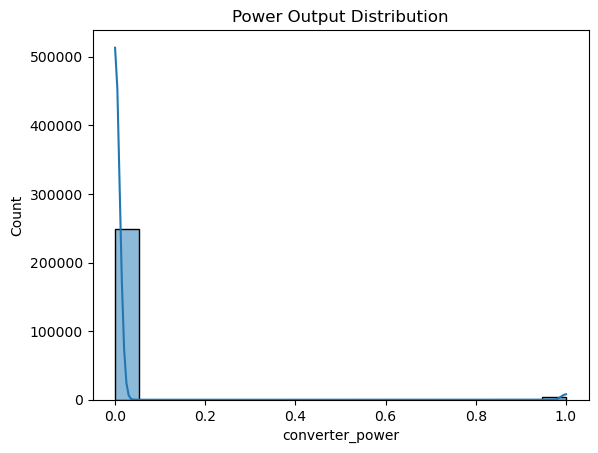

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of wind speed and power
sns.histplot(df["wind_speed"], kde=True)
plt.title("Wind Speed Distribution")
plt.show()

sns.histplot(df["converter_power"], kde=True)
plt.title("Power Output Distribution")
plt.show()


In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv(r"E:\Wind Turbines\20180101-20180131 - C (1).csv", encoding='ISO-8859-1')  # Update with your path

# Optional: Set datetime index (if timestamp is available)
# df['timestamp'] = pd.to_datetime(df['timestamp_column'])
# df.set_index('timestamp', inplace=True)

# Drop constant or irrelevant features
df = df.loc[:, df.nunique() > 1]

# List of useful features (vibration, wind speed, power, pitch, etc.)
selected_features = [
    'nacelle_vibration_sensor_x', 'nacelle_vibration_sensor_y',
    'nacelle_vibration_effective_value', 'wind_speed', 'converter_power',
    'converter_motor_speed', 'controller_pitch_position_setpoint'
]

df = df[selected_features]

# Normalize features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [8]:
import numpy as np

def create_sequences(data, seq_length=60):
    """
    Create sequences of shape [samples, sequence length, features]
    """
    X = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
    return np.array(X)

# Example: 60 time steps (~10 minutes x 60 = 10 hours)
sequence_length = 60
data_array = df_scaled.values
X_seq = create_sequences(data_array, seq_length=sequence_length)

print("Shape of input sequences:", X_seq.shape)  # (n_samples, 60, n_features)


Shape of input sequences: (252660, 60, 7)


In [9]:
import torch
import torch.nn as nn
import math

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=500):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float32).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.pe = pe.unsqueeze(0)

    def forward(self, x):
        x = x + self.pe[:, :x.size(1)].to(x.device)
        return x


In [10]:
class TransformerAutoencoder(nn.Module):
    def __init__(self, feature_dim, seq_len, d_model=64, nhead=4, num_layers=2):
        super(TransformerAutoencoder, self).__init__()
        self.input_fc = nn.Linear(feature_dim, d_model)
        self.pos_encoder = PositionalEncoding(d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.output_fc = nn.Linear(d_model, feature_dim)

    def forward(self, x):
        # x: [batch_size, seq_len, feature_dim]
        x = self.input_fc(x)
        x = self.pos_encoder(x)
        x = self.transformer_encoder(x)
        x = self.output_fc(x)
        return x


In [14]:
X_seq.shape = (252660, 60, 7)  # (samples, time_steps, features)


In [15]:
import torch
import torch.nn as nn
import math

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1).float()
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe.unsqueeze(0))

    def forward(self, x):
        x = x + self.pe[:, :x.size(1)]
        return x

class TransformerAutoencoder(nn.Module):
    def __init__(self, feature_dim, seq_len, d_model=64, nhead=4, num_layers=2):
        super().__init__()
        self.input_fc = nn.Linear(feature_dim, d_model)
        self.pos_encoder = PositionalEncoding(d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.output_fc = nn.Linear(d_model, feature_dim)

    def forward(self, x):
        x = self.input_fc(x)
        x = self.pos_encoder(x)
        x = self.transformer_encoder(x)
        x = self.output_fc(x)
        return x


In [16]:
from torch.utils.data import DataLoader, TensorDataset

X_tensor = torch.tensor(X_seq, dtype=torch.float32)
dataset = TensorDataset(X_tensor)
train_loader = DataLoader(dataset, batch_size=128, shuffle=True)


In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = TransformerAutoencoder(feature_dim=7, seq_len=60).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for batch in train_loader:
        x = batch[0].to(device)
        output = model(x)
        loss = criterion(output, x)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_loader):.6f}")


Epoch 1/10, Loss: 0.035828
Epoch 2/10, Loss: 0.008875
Epoch 3/10, Loss: 0.000770
Epoch 4/10, Loss: 0.000863
Epoch 5/10, Loss: 0.000357
Epoch 6/10, Loss: 0.000167
Epoch 7/10, Loss: 0.000121
Epoch 8/10, Loss: 0.000094
Epoch 9/10, Loss: 0.000070
Epoch 10/10, Loss: 0.000094


In [18]:
model.eval()
recon_errors = []

with torch.no_grad():
    for batch in DataLoader(dataset, batch_size=128):
        x = batch[0].to(device)
        x_hat = model(x)
        loss = torch.mean((x - x_hat) ** 2, dim=(1, 2))  # MSE per sequence
        recon_errors.extend(loss.cpu().numpy())


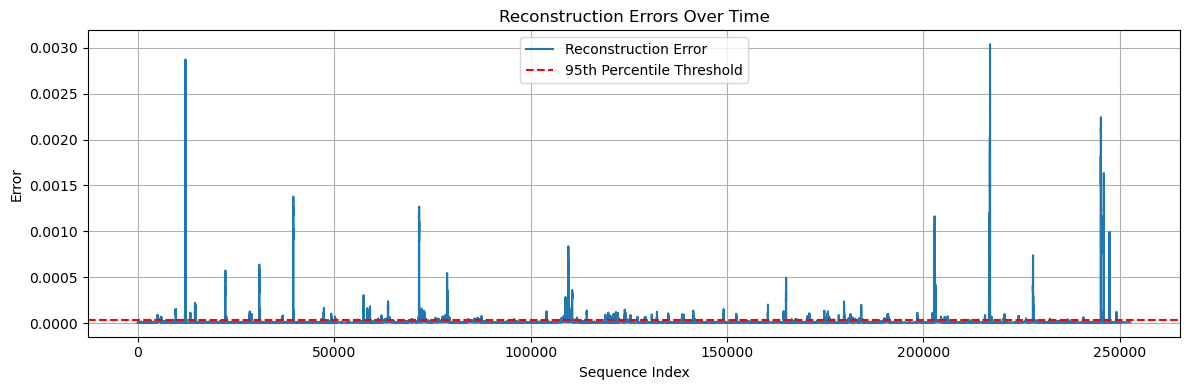

In [19]:
import matplotlib.pyplot as plt
import numpy as np

recon_errors = np.array(recon_errors)

plt.figure(figsize=(12, 4))
plt.plot(recon_errors, label="Reconstruction Error")
plt.axhline(y=np.percentile(recon_errors, 95), color='r', linestyle='--', label="95th Percentile Threshold")
plt.title("Reconstruction Errors Over Time")
plt.xlabel("Sequence Index")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
threshold = np.percentile(recon_errors, 95)  # or tune manually
anomalies = recon_errors > threshold

print(f"Total Sequences: {len(recon_errors)}")
print(f"Detected Anomalies: {np.sum(anomalies)}")


Total Sequences: 252660
Detected Anomalies: 12633


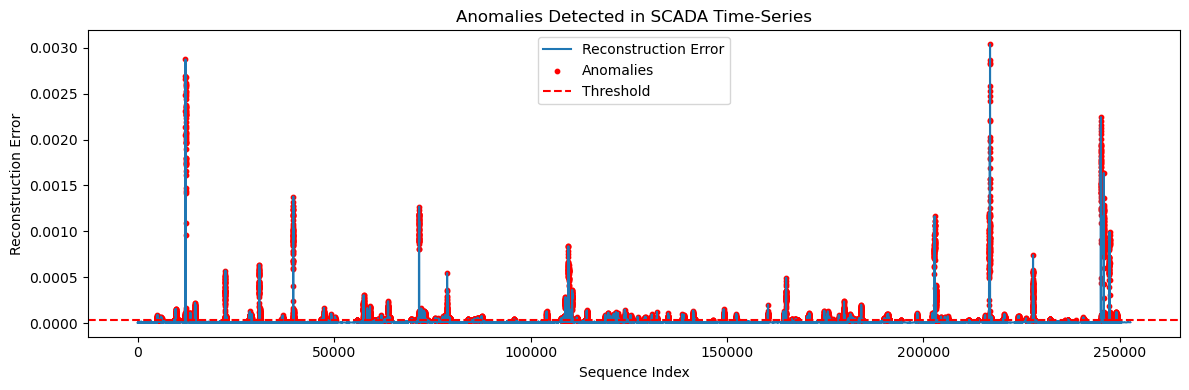

In [23]:
plt.figure(figsize=(12, 4))
plt.plot(recon_errors, label="Reconstruction Error")
plt.scatter(np.where(anomalies)[0], recon_errors[anomalies], color='red', label="Anomalies", s=10)
plt.axhline(y=threshold, color='r', linestyle='--', label="Threshold")
plt.title("Anomalies Detected in SCADA Time-Series")
plt.xlabel("Sequence Index")
plt.ylabel("Reconstruction Error")
plt.legend()

plt.tight_layout()
plt.show()


In [25]:
anomaly_indices = np.where(anomalies)[0]
actual_anomaly_rows = anomaly_indices + sequence_length  # shift to original index

# Replace 'df_cleaned' with your actual DataFrame name
anomalous_data = df.iloc[actual_anomaly_rows]

print(f"Sample anomalous data:\n{anomalous_data.head()}")


Sample anomalous data:
      nacelle_vibration_sensor_x  nacelle_vibration_sensor_y  \
5060                    0.000504                    0.000015   
5061                   -0.001938                    0.000504   
5078                   -0.000961                    0.000504   
5079                   -0.001450                    0.000015   
5080                    0.000504                    0.000015   

      nacelle_vibration_effective_value  wind_speed  converter_power  \
5060                           0.000884    4.394666                1   
5061                           0.001710    3.393658                1   
5078                           0.000996    4.382458                1   
5079                           0.001400    4.095584                1   
5080                           0.000376    4.614399                1   

      converter_motor_speed  controller_pitch_position_setpoint  
5060                      0                                 0.0  
5061                      0

In [28]:
import numpy as np

# Label each sequence as normal (0) or anomaly (1)
labels = np.zeros(len(recon_errors))
labels[anomaly_indices] = 1

print(f"Total Sequences: {len(labels)}")
print(f"Anomalies: {np.sum(labels)}")


Total Sequences: 252660
Anomalies: 12633.0


In [34]:
import pandas as pd

def summarize_sequence(seq):
    # seq: shape (60, 7)
    return np.concatenate([
        seq.mean(axis=0),
        seq.std(axis=0),
        seq.min(axis=0),
        seq.max(axis=0)
    ])

# Apply summarization
X_summary = np.array([summarize_sequence(seq) for seq in X_seq])
X_df = pd.DataFrame(X_summary, columns=[
    f'{stat}_{feat}' 
    for stat in ['mean', 'std', 'min', 'max']
    for feat in df.columns
])

print(f"Feature shape for LightGBM: {X_df.shape}")


Feature shape for LightGBM: (252660, 28)


In [38]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_df, labels, test_size=0.2, random_state=42)

# Train LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)


# Evaluate
y_pred = lgb_model.predict(X_test)
print(classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 10095, number of negative: 192033
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3603
[LightGBM] [Info] Number of data points in the train set: 202128, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.049944 -> initscore=-2.945627
[LightGBM] [Info] Start training from score -2.945627
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     47994
         1.0       0.92      0.89      0.90      2538

    accuracy                           0.99     50532
   macro avg       0.96      0.94      0.95     50532
weighted avg       0.99      0.99      0.99     50532



c:\Users\Muhammad Umar\anaconda3\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(
C:\Users\Muhammad Umar\AppData\Local\Temp\ipykernel_12236\2597043920.py:11: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type="bar")


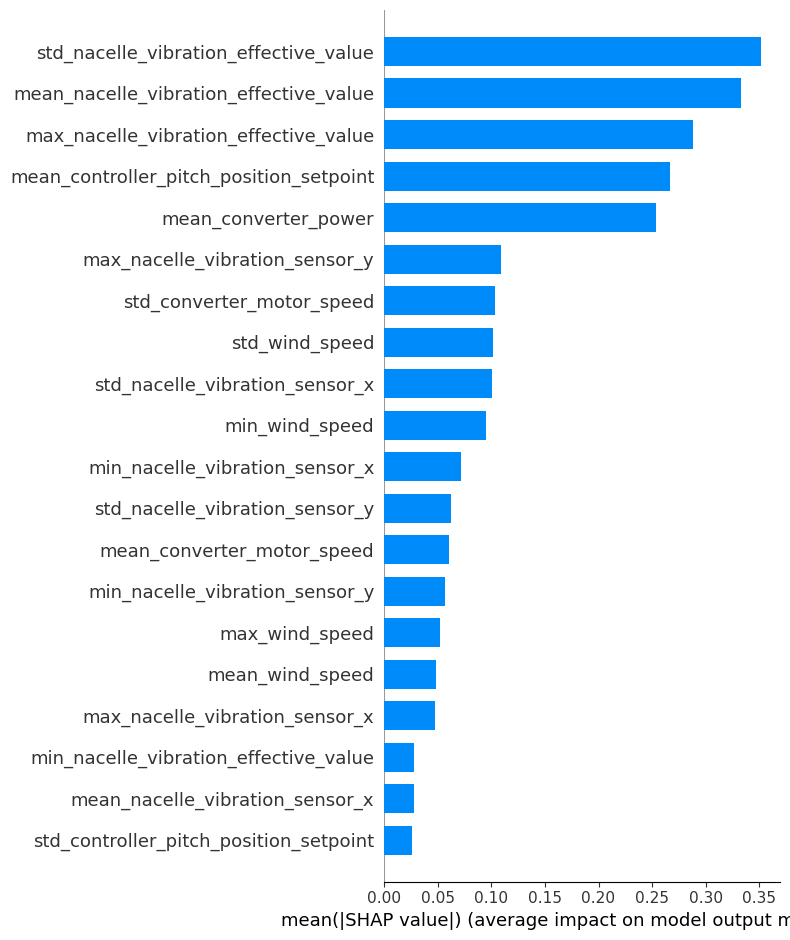

C:\Users\Muhammad Umar\AppData\Local\Temp\ipykernel_12236\2597043920.py:14: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


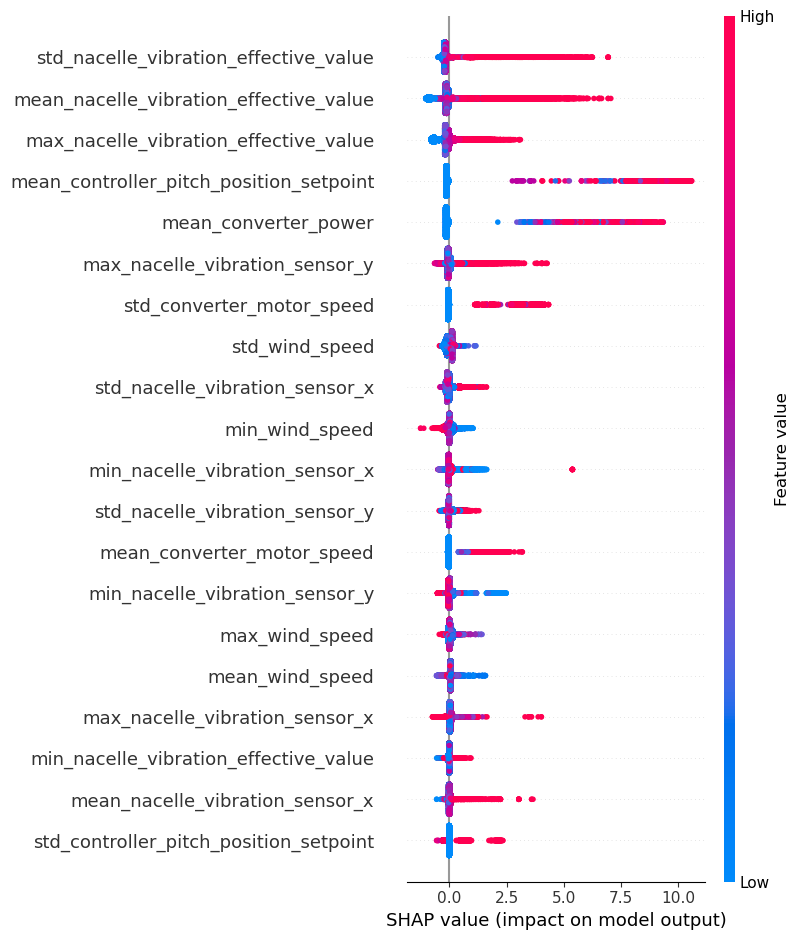

In [40]:
import shap
import matplotlib.pyplot as plt

# ✅ TreeExplainer expects a tree model (LightGBM)
explainer = shap.TreeExplainer(lgb_model)

# Compute SHAP values for test set
shap_values = explainer.shap_values(X_test)

# Plot global importance
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Optional: Beeswarm for per-sample impact
shap.summary_plot(shap_values, X_test)


c:\Users\Muhammad Umar\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


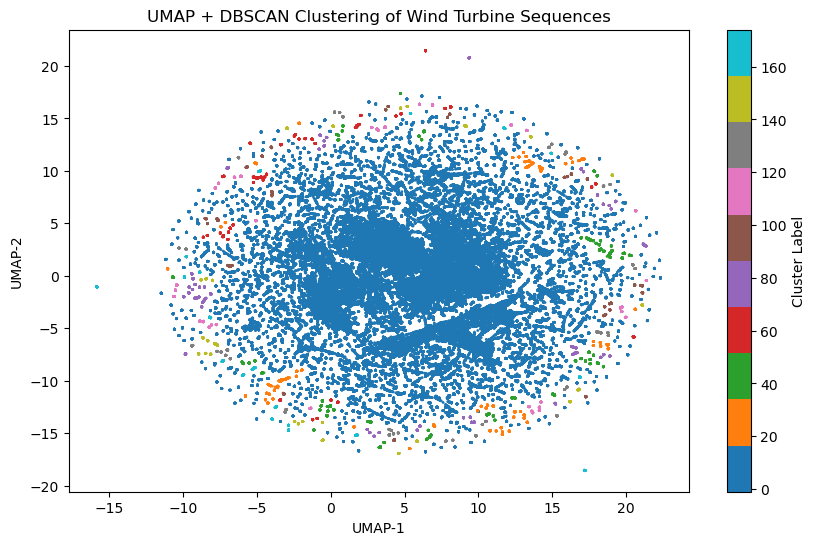

In [41]:
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Step 1: Scale the features before UMAP
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

# Step 2: Apply UMAP for 2D projection
umap_model = umap.UMAP(n_neighbors=30, min_dist=0.1, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# Step 3: Cluster with DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=50)
cluster_labels = dbscan.fit_predict(X_umap)

# Step 4: Visualize UMAP with clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=cluster_labels, cmap='tab10', s=1)
plt.title("UMAP + DBSCAN Clustering of Wind Turbine Sequences")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.colorbar(label='Cluster Label')
plt.show()


<Figure size 600x400 with 0 Axes>

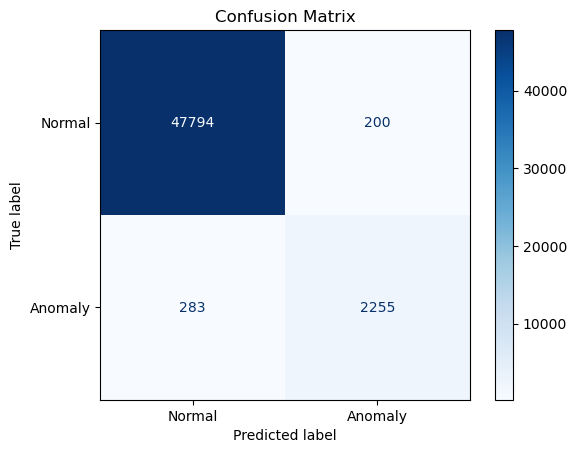

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Anomaly'])

plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()


In [47]:
# Example: if y_test contains true labels
y_true = y_test  # Make sure y_test is available and correct


c:\Users\Muhammad Umar\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


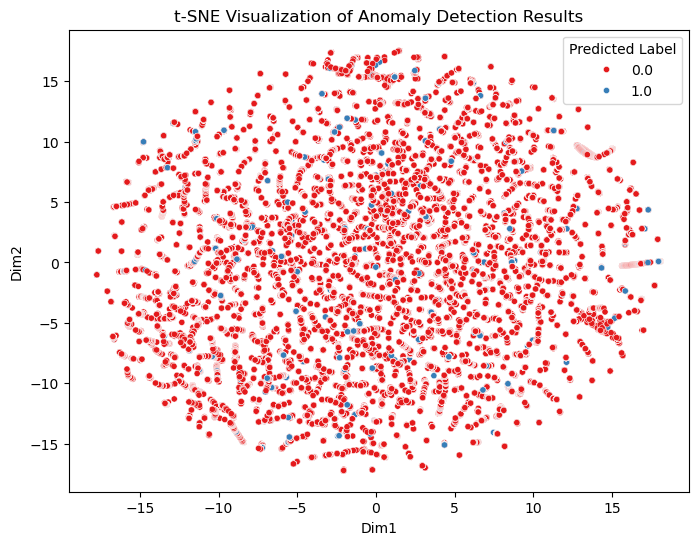

In [50]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Subset the features that match y_pred (probably the same ones used in modeling)
X_used_for_detection = X_summary[:len(y_pred)]  # Ensure matching dimensions

# Run t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
X_embedded = tsne.fit_transform(X_used_for_detection)

# Create DataFrame for plotting
tsne_df = pd.DataFrame()
tsne_df["Dim1"] = X_embedded[:, 0]
tsne_df["Dim2"] = X_embedded[:, 1]
tsne_df["Label"] = y_pred  # Now length matches

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x="Dim1", y="Dim2", hue="Label", palette="Set1", s=20)
plt.title("t-SNE Visualization of Anomaly Detection Results")
plt.legend(title="Predicted Label")
plt.show()


<Axes: xlabel='Dim1', ylabel='Dim2'>

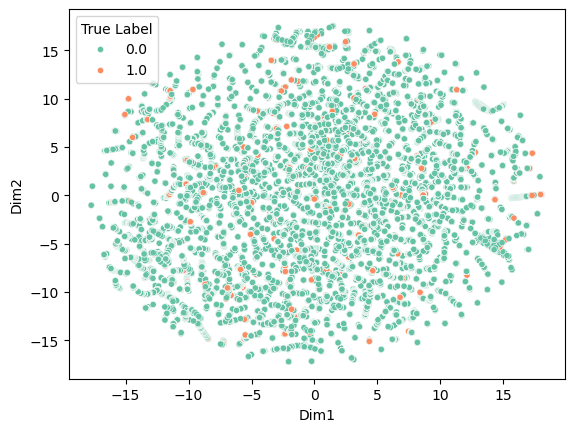

In [51]:
tsne_df["True Label"] = y_true[:len(y_pred)]
sns.scatterplot(data=tsne_df, x="Dim1", y="Dim2", hue="True Label", palette="Set2", s=20)


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_true[:len(y_pred)], y_pred, target_names=["Normal", "Anomaly"]))


              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99     47994
     Anomaly       0.92      0.89      0.90      2538

    accuracy                           0.99     50532
   macro avg       0.96      0.94      0.95     50532
weighted avg       0.99      0.99      0.99     50532



c:\Users\Muhammad Umar\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\Muhammad Umar\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Text(0.5, 1.0, 'UMAP Visualization of Anomaly Detection')

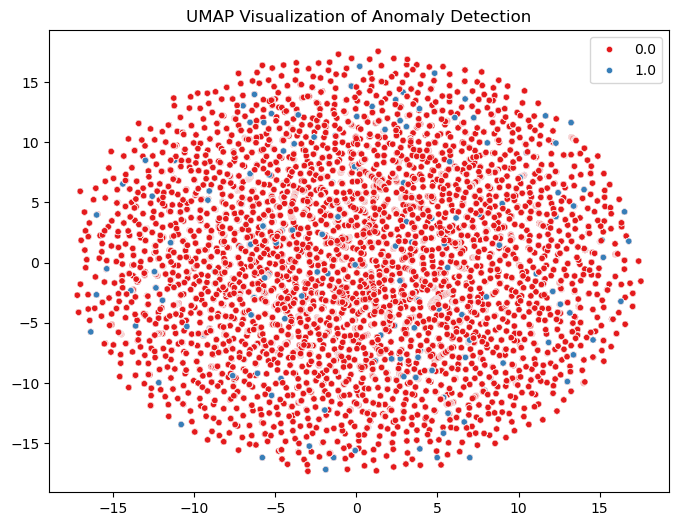

In [53]:
import umap
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_model.fit_transform(X_used_for_detection)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y_pred, palette="Set1", s=20)
plt.title("UMAP Visualization of Anomaly Detection")
